<a href="https://colab.research.google.com/github/shekharpalit/recommendation-system-using-deep-learning-/blob/master/recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [126]:
!wget -O moviedataset.zip http://files.grouplens.org/datasets/movielens/ml-latest.zip


--2018-11-21 00:09:11--  http://files.grouplens.org/datasets/movielens/ml-latest.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.34.235
Connecting to files.grouplens.org (files.grouplens.org)|128.101.34.235|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 277113433 (264M) [application/zip]
Saving to: ‘moviedataset.zip’

moviedataset.zip    100%[===================>] 264.28M  17.6MB/s    in 16s     

2018-11-21 00:09:28 (16.3 MB/s) - ‘moviedataset.zip’ saved [277113433/277113433]



In [127]:
!unzip -o moviedataset.zip 

Archive:  moviedataset.zip
   creating: ml-latest/
  inflating: ml-latest/links.csv     
  inflating: ml-latest/tags.csv      
  inflating: ml-latest/genome-tags.csv  
  inflating: ml-latest/ratings.csv   
  inflating: ml-latest/README.txt    
  inflating: ml-latest/genome-scores.csv  
  inflating: ml-latest/movies.csv    


In [128]:
!ls


ml-1m	   ml-1m.zip.1	ml-latest	  sample_data
ml-1m.zip  ml-1m.zip.2	moviedataset.zip


In [0]:
import tensorflow as tf 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [130]:
movies_df = pd.read_csv('ml-latest/movies.csv',sep=',', header = None)
movies_df.head()

,0,1,2
0,movieId,title,genres
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,2,Jumanji (1995),Adventure|Children|Fantasy
3,3,Grumpier Old Men (1995),Comedy|Romance
4,4,Waiting to Exhale (1995),Comedy|Drama|Romance


In [132]:
ratings_df = pd.read_csv('ml-latest/ratings.csv',sep=',', header = None)
ratings_df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,0,1,2,3
0,userId,movieId,rating,timestamp
1,1,307,3.5,1256677221
2,1,481,3.5,1256677456
3,1,1091,1.5,1256677471
4,1,1257,4.5,1256677460


In [0]:
movies_df.columns = ['MovieID', 'Title', 'Genres']
ratings_df.columns = ['UserID', 'MovieID', 'Rating', 'TimeStamp']

In [134]:
movies_df.head()

,MovieID,Title,Genres
0,movieId,title,genres
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,2,Jumanji (1995),Adventure|Children|Fantasy
3,3,Grumpier Old Men (1995),Comedy|Romance
4,4,Waiting to Exhale (1995),Comedy|Drama|Romance


In [135]:
ratings_df.head()

,UserID,MovieID,Rating,TimeStamp
0,userId,movieId,rating,timestamp
1,1,307,3.5,1256677221
2,1,481,3.5,1256677456
3,1,1091,1.5,1256677471
4,1,1257,4.5,1256677460


In [136]:
 len(movie_df)

3883

In [137]:
movies_df.tail()

,MovieID,Title,Genres
58094,193876,The Great Glinka (1946),(no genres listed)
58095,193878,Les tribulations d'une caissière (2011),Comedy
58096,193880,Her Name Was Mumu (2016),Drama
58097,193882,Flora (2017),Adventure|Drama|Horror|Sci-Fi
58098,193886,Leal (2018),Action|Crime|Drama


In [139]:
movies_df['List Index'] = movies_df.index
movies_df.head()

,MovieID,Title,Genres,List Index
0,movieId,title,genres,0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1
2,2,Jumanji (1995),Adventure|Children|Fantasy,2
3,3,Grumpier Old Men (1995),Comedy|Romance,3
4,4,Waiting to Exhale (1995),Comedy|Drama|Romance,4


In [140]:
merged_df = movie_df.merge(rating_df, on='MovieID')#merge movie dataframe with ratings
merged_df = merged_df.drop('TimeStamp', axis = 1).drop('Title', axis = 1).drop('Genres', axis = 1)
merged_df.head()

,MovieID,List Index,UserID,Rating
0,1,0,1,5
1,1,0,6,4
2,1,0,8,4
3,1,0,9,5
4,1,0,10,5


In [141]:
#group by user ID
user_Group = merged_df.groupby('UserID')
print(user_Group.head())

        MovieID  List Index  UserID  Rating
0             1           0       1       5
1             1           0       6       4
2             1           0       8       4
3             1           0       9       5
4             1           0      10       5
5             1           0      18       4
6             1           0      19       5
7             1           0      21       3
8             1           0      23       4
9             1           0      26       3
10            1           0      28       3
11            1           0      34       5
12            1           0      36       5
13            1           0      38       5
14            1           0      44       5
15            1           0      45       4
16            1           0      48       4
17            1           0      49       5
18            1           0      51       5
19            1           0      56       5
20            1           0      60       4
21            1           0     

In [142]:
#amount of users used for training 


amountOfUsedUsers = 1000

# Creating the training list
trX = []

# For each user in the group
for userID, curUser in user_Group:

    # Create a temp that stores every movie's rating
    temp = [0]*len(movies_df)

    # For each movie in curUser's movie list
    for num, movie in curUser.iterrows():

        # Divide the rating by 5 and store it
        temp[movie['List Index']] = movie['Rating']/5.0

    # Add the list of ratings into the training list
    trX.append(temp)

    # Check to see if we finished adding in the amount of users for training
    if amountOfUsedUsers == 0:
        break
    amountOfUsedUsers -= 1
print(trX)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [0]:
hiddenUnits = 50
visibleUnits = len(movies_df)
vb = tf.placeholder(tf.float32, [visibleUnits])  # Number of unique movies
hb = tf.placeholder(tf.float32, [hiddenUnits])  # Number of features were going to learn
W = tf.placeholder(tf.float32, [visibleUnits, hiddenUnits])  # Weight Matrix

In [0]:
# Phase 1: Input Processing
v0 = tf.placeholder("float", [None, visibleUnits])
_h0 = tf.nn.sigmoid(tf.matmul(v0, W) + hb)  # Visible layer activation
h0 = tf.nn.relu(tf.sign(_h0 - tf.random_uniform(tf.shape(_h0))))  # Gibb's Sampling

# Phase 2: Reconstruction
_v1 = tf.nn.sigmoid(tf.matmul(h0, tf.transpose(W)) + vb)  # Hidden layer activation
v1 = tf.nn.relu(tf.sign(_v1 - tf.random_uniform(tf.shape(_v1))))
h1 = tf.nn.sigmoid(tf.matmul(v1, W) + hb)

In [0]:
# Learning rate
alpha = 1.0

# Create the gradients
w_pos_grad = tf.matmul(tf.transpose(v0), h0)
w_neg_grad = tf.matmul(tf.transpose(v1), h1)

# Calculate the Contrastive Divergence to maximize
CD = (w_pos_grad - w_neg_grad) / tf.to_float(tf.shape(v0)[0])

# Create methods to update the weights and biases
update_w = W + alpha * CD
update_vb = vb + alpha * tf.reduce_mean(v0 - v1, 0)
update_hb = hb + alpha * tf.reduce_mean(h0 - h1, 0)

# Set the error function, here we use Mean Absolute Error Function
err = v0 - v1
err_sum = tf.reduce_mean(err*err)

In [0]:
# Current weight
cur_w = np.zeros([visibleUnits, hiddenUnits], np.float32)

# Current visible unit biases
cur_vb = np.zeros([visibleUnits], np.float32)

# Current hidden unit biases
cur_hb = np.zeros([hiddenUnits], np.float32)

# Previous weight
prv_w = np.zeros([visibleUnits, hiddenUnits], np.float32)

# Previous visible unit biases
prv_vb = np.zeros([visibleUnits], np.float32)

# Previous hidden unit biases
prv_hb = np.zeros([hiddenUnits], np.float32)
sess = tf.Session()
sess.run(tf.global_variables_initializer())

0.09492873
0.05113537
0.03489034
0.026355153
0.018353712
0.012372804
0.0068426277
0.004776221
0.0035334183
0.003417285
0.0032849326
0.0032098568
0.0031267095
0.0030429058
0.0029605492


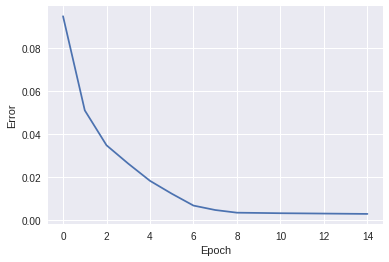

In [147]:
# Train RBM with 15 Epochs, with Each Epoch using 10 batches with size 100, After training print out the error by epoch
epochs = 15
batchsize = 100
errors = []
for i in range(epochs):
    for start, end in zip(range(0, len(trX), batchsize), range(batchsize, len(trX), batchsize)):
        batch = trX[start:end]
        cur_w = sess.run(update_w, feed_dict={v0: batch, W: prv_w, vb: prv_vb, hb: prv_hb})
        cur_vb = sess.run(update_vb, feed_dict={v0: batch, W: prv_w, vb: prv_vb, hb: prv_hb})
        cur_hb = sess.run(update_hb, feed_dict={v0: batch, W: prv_w, vb: prv_vb, hb: prv_hb})
        prv_w = cur_w
        prv_vb = cur_vb
        prv_hb = cur_hb
    errors.append(sess.run(err_sum, feed_dict={v0: trX, W: cur_w, vb: cur_vb, hb: cur_hb}))
    print(errors[-1])
plt.plot(errors)
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.show()

In [0]:
inputUser = [trX[10]]

In [0]:
hh0 = tf.nn.sigmoid(tf.matmul(v0, W) + hb)
vv1 = tf.nn.sigmoid(tf.matmul(hh0, tf.transpose(W)) + vb)
feed = sess.run(hh0, feed_dict={v0: inputUser, W: prv_w, hb: prv_hb})
rec = sess.run(vv1, feed_dict={hh0: feed, W: prv_w, vb: prv_vb})


In [151]:

# List the 20 most recommended movies for our mock user by sorting it by their scores given by our model.
scored_movies_df_50 = movies_df
scored_movies_df_50["Recommendation Score"] = rec[0]
print(scored_movies_df_50.sort_values(["Recommendation Score"], ascending=False).head(20))

     MovieID                                              Title  \
589      594             Snow White and the Seven Dwarfs (1937)   
1959    2041                                   Condorman (1981)   
315      317                           Santa Clause, The (1994)   
604      609    Homeward Bound II: Lost in San Francisco (1996)   
2693    2777                                       Cobra (1925)   
1245    1272                                      Patton (1970)   
108      109                Headless Body in Topless Bar (1995)   
2928    3012                             Battling Butler (1926)   
1250    1277                          Cyrano de Bergerac (1990)   
1078    1099                          Christmas Carol, A (1938)   
1854    1936                                Mrs. Miniver (1942)   
1656    1715                               Office Killer (1997)   
1372    1404                    Night Falls on Manhattan (1996)   
49        49                       When Night Is Falling (1995

In [152]:
# Find the mock user's UserID from the data
print(merged_df.iloc[50])  # Result you get is UserID 150

MovieID         1
List Index      0
UserID        150
Rating          4
Name: 50, dtype: int64


In [153]:
# Find all movies the mock user has watched before
movies_df_50 = merged_df[merged_df['UserID'] == 150]
print(movies_df_50.head())

       MovieID  List Index  UserID  Rating
50           1           0     150       4
11866       24          23     150       4
12492       25          24     150       4
15967       34          33     150       5
36528      111         109     150       4


In [0]:
# Merging movies_df with ratings_df by MovieID
merged_df_50 = scored_movies_df_50.merge(movies_df_50, on='MovieID', how='outer')

In [0]:
# Dropping unnecessary columns
merged_df_50 = merged_df_50.drop('List Index_y', axis=1).drop('UserID', axis=1)

In [156]:
# Sort and take a look at first 20 rows
print(merged_df_50.sort_values(['Recommendation Score'], ascending=False).head(20))

     MovieID                                              Title  \
589      594             Snow White and the Seven Dwarfs (1937)   
1959    2041                                   Condorman (1981)   
315      317                           Santa Clause, The (1994)   
604      609    Homeward Bound II: Lost in San Francisco (1996)   
2693    2777                                       Cobra (1925)   
1245    1272                                      Patton (1970)   
108      109                Headless Body in Topless Bar (1995)   
2928    3012                             Battling Butler (1926)   
1250    1277                          Cyrano de Bergerac (1990)   
1078    1099                          Christmas Carol, A (1938)   
1854    1936                                Mrs. Miniver (1942)   
1656    1715                               Office Killer (1997)   
1372    1404                    Night Falls on Manhattan (1996)   
49        49                       When Night Is Falling (1995